In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
df= pd.read_csv('nhanes_2015_2016.csv')
df

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,...,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,5.0,...,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,4.0,...,146.0,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,1.0,...,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0


In [4]:
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [5]:
vars = ['SMQ020', 'RIAGENDR', 'RIDAGEYR','BPXSY1','BMXBMI', 'BMXLEG']
df = df[vars].dropna()
df

,SMQ020,RIAGENDR,RIDAGEYR,BPXSY1,BMXBMI,BMXLEG
0,1,1,62,128.0,27.8,43.3
1,1,1,53,146.0,30.8,38.0
2,1,1,78,138.0,28.8,35.6
3,2,2,56,132.0,42.4,38.5
4,2,2,42,100.0,20.3,37.4
...,...,...,...,...,...,...
5730,1,2,76,112.0,21.5,38.2
5731,2,1,26,118.0,33.8,43.4
5732,1,2,80,154.0,31.0,31.3
5733,1,1,35,104.0,26.0,40.3


In [6]:
df[vars].corr()

,SMQ020,RIAGENDR,RIDAGEYR,BPXSY1,BMXBMI,BMXLEG
SMQ020,1.000000,0.180578,-0.147325,-0.093587,-0.027803,-0.080541
RIAGENDR,0.180578,1.000000,-0.017498,-0.104578,0.071564,-0.527342
RIDAGEYR,-0.147325,-0.017498,1.000000,0.466838,0.049514,-0.309734
BPXSY1,-0.093587,-0.104578,0.466838,1.000000,0.141162,-0.080850
BMXBMI,-0.027803,0.071564,0.049514,0.141162,1.000000,-0.062964
BMXLEG,-0.080541,-0.527342,-0.309734,-0.080850,-0.062964,1.000000


In [7]:
model = sm.OLS.from_formula ('BPXSY1 ~ RIDAGEYR',
                            data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     1417.
Date:                Tue, 19 Oct 2021   Prob (F-statistic):          8.81e-274
Time:                        04:26:50   Log-Likelihood:                -21375.
No. Observations:                5087   AIC:                         4.275e+04
Df Residuals:                    5085   BIC:                         4.277e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.5497      0.632    162.192      0.000     101.310     103.789
RIDAGEYR       0.4672      0.012     37.644      0.000       0.443       0.492
==============================================================================
Omnibus:                      717.009   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1643.192
Skew:                           0.823   Prob(JB):                         0.00
Kurtosis:                       5.246   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

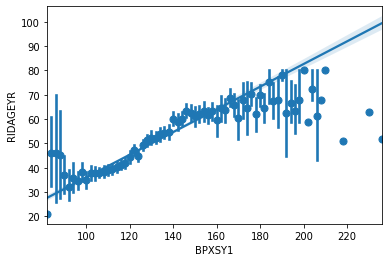

In [8]:
ax = sns.regplot (x = 'BPXSY1',
                  y = 'RIDAGEYR',
                  data = df,
                 x_estimator = np.mean,
                 )

In [9]:
x = result.fittedvalues
y = result.resid

Text(0, 0.5, 'residuales')

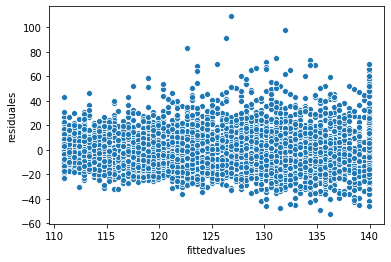

In [10]:
fig = sns.scatterplot ( x = x,
                       y = y,
                      )
fig.set_xlabel ('fittedvalues')
fig.set_ylabel ('residuales')

In [12]:
model = sm.OLS.from_formula ('BPXSY1 ~ RIDAGEYR + RIAGENDR',
                            data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     747.5
Date:                Tue, 19 Oct 2021   Prob (F-statistic):          2.60e-285
Time:                        04:34:31   Log-Likelihood:                -21344.
No. Observations:                5087   AIC:                         4.269e+04
Df Residuals:                    5084   BIC:                         4.271e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    107.9643      0.935    115.459      0.000     106.131     109.797
RIDAGEYR       0.4656      0.012     37.723      0.000       0.441       0.490
RIAGENDR      -3.5269      0.451     -7.821      0.000      -4.411      -2.643
==============================================================================
Omnibus:                      742.153   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1762.511
Skew:                           0.837   Prob(JB):                         0.00
Kurtosis:                       5.349   Cond. No.                         226.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""